# Part I - Loan Data from Prosper
## by Ilesanmi Tosin


## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.   



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Read the loan data from the local system. (It has been downloaded already)
df_loan=pd.read_csv("prosperLoanData.csv")

In [3]:
# View the first 5 rows of the data 
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# To view the information of the dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# To view the shape of the date i.e the rows and columns
df_loan.shape

(113937, 81)

In [6]:
# To check for duplicate values
df_loan.duplicated().sum()

0

In [7]:
# To check for null values
df_loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [8]:
selected_col =  [
    'Term', 'LoanStatus','MonthlyLoanPayment', 'LoanOriginalAmount', 'IncomeRange', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 
    'StatedMonthlyIncome', 'LoanOriginationDate', 'BorrowerAPR',
    'BorrowerState','Occupation'
]

In [9]:
# Replicate the dataset and keep a copy of the master dataset
df_loan_copy=df_loan.copy()

In [10]:
# Remove the unnecessary columns in the table
for columns in df_loan_copy.columns:
    if columns not in selected_col:
        del df_loan_copy[columns]
        
df_loan_copy.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,36,Completed,0.16516,0.1580,NaN,0,CO,Other,Self-employed,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43
1,36,Current,0.12016,0.0920,A,2,CO,Professional,Employed,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,318.93
2,36,Completed,0.28269,0.2750,NaN,0,GA,Other,Not available,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32
3,36,Current,0.12528,0.0974,A,16,GA,Skilled Labor,Employed,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,321.45
4,36,Current,0.24614,0.2085,D,2,MN,Executive,Employed,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,563.97


In [11]:
# The year in which the loan originated is extracted from the dataset
df_loan_copy['LoanOriginationYear']= pd.DatetimeIndex(df_loan_copy['LoanOriginationDate']).year

In [12]:
# To view the data sample once again to confirm the new year column added
df_loan_copy.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LoanOriginationYear
0,36,Completed,0.16516,0.1580,NaN,0,CO,Other,Self-employed,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43,2007
1,36,Current,0.12016,0.0920,A,2,CO,Professional,Employed,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,318.93,2014
2,36,Completed,0.28269,0.2750,NaN,0,GA,Other,Not available,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32,2007
3,36,Current,0.12528,0.0974,A,16,GA,Skilled Labor,Employed,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,321.45,2012
4,36,Current,0.24614,0.2085,D,2,MN,Executive,Employed,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,563.97,2013


In [13]:
# To check if we have null values
df_loan_copy.isnull().sum()

Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
IncomeRange                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LoanOriginationYear              0
dtype: int64

In [14]:
df_loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   IncomeRange                113937 non-null  object 
 10  StatedMonthlyIncome        113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  LoanOriginationDate        113937 non-null  object 
 13  MonthlyLoanPayment         11

#### Clean the Data
The following quality and tidiness issues were discovered in the analysis


1. The loan columns should be standardized to Completed and non remittance as status
2. The Loan Origination date should have a datetime datatype
3. The information in the listing category column should be decoded to have the same information in the data dictionary which is easier to capture and understand.
4. Renaming of some columns such as Listing Category and Prosper Rating(Alpha).
5. Some of the columns in the dataset have missing values


### ISSUE #1
#### Define: Standardization of the loan status columns to show Completed and non remittance as status.

#### Code:

In [15]:
# To standardize the values in the loan status columns to have only Completed and non_remittance 
condition = (df_loan_copy['LoanStatus'] == 'Completed') | (df_loan_copy['LoanStatus'] == 'non-remittance') |\
                  (df_loan_copy['LoanStatus'] == 'Chargedoff')
df_loan_copy = df_loan_copy[condition]

def standardize_loan_status(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'non-remittance'
    else:
        return row['LoanStatus']

df_loan_copy['LoanStatus'] = df_loan_copy.apply(standardize_loan_status, axis=1)

#### Test:

In [16]:
# Check the table to confirm the changes that have been made
df_loan_copy.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LoanOriginationYear
0,36,Completed,0.16516,0.1580,NaN,0,CO,Other,Self-employed,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43,2007
2,36,Completed,0.28269,0.2750,NaN,0,GA,Other,Not available,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32,2007
11,36,Completed,0.15033,0.1325,NaN,0,NaN,Waiter/Waitress,Full-time,"$1-24,999",1666.666667,1000,2007-10-18 00:00:00,33.81,2007
17,36,non-remittance,0.13202,0.1250,NaN,0,NaN,Professional,Not available,Not displayed,5833.333333,10000,2006-08-22 00:00:00,334.54,2006
21,36,Completed,0.21488,0.2075,NaN,0,MI,Professional,Full-time,"$25,000-49,999",3750.000000,3000,2007-12-12 00:00:00,112.64,2007


In [17]:
# To confirm the number of completed and non-remittance loans
df_loan_copy['LoanStatus'].value_counts()

Completed         38074
non-remittance    11992
Name: LoanStatus, dtype: int64

### ISSUE #2
#### Define: The Loan Origination date should have a datetime datatype

#### Code:

In [18]:
# To convert the loan origination date's data type to datetime
df_loan_copy['LoanOriginationDate']=pd.to_datetime(df_loan_copy['LoanOriginationDate'])

#### Test:

In [19]:
df_loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50066 entries, 0 to 113935
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Term                       50066 non-null  int64         
 1   LoanStatus                 50066 non-null  object        
 2   BorrowerAPR                50041 non-null  float64       
 3   BorrowerRate               50066 non-null  float64       
 4   ProsperRating (Alpha)      25000 non-null  object        
 5   ListingCategory (numeric)  50066 non-null  int64         
 6   BorrowerState              45143 non-null  object        
 7   Occupation                 48323 non-null  object        
 8   EmploymentStatus           48336 non-null  object        
 9   IncomeRange                50066 non-null  object        
 10  StatedMonthlyIncome        50066 non-null  float64       
 11  LoanOriginalAmount         50066 non-null  int64         
 12  Loa

### ISSUE #3
#### Define: The information in the listing category column should be decoded to have the same information in the data dictionary

#### Code

In [20]:
# Encode the listing category
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}


# To replace the values in the listing category
df_loan_copy['ListingCategory (numeric)']=df_loan_copy['ListingCategory (numeric)'].replace(list_dict)

# https://kanoki.org/2019/04/06/pandas-map-dictionary-values-with-dataframe-columns/

#### Test

In [21]:
# Lets check a sample of the data to confirm the changes
df_loan_copy.sample(50)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LoanOriginationYear
79636,36,Completed,0.23808,0.2155,NaN,Other,CA,Other,Full-time,"$25,000-49,999",2426.666667,1000,2008-07-24,37.96,2008
89908,36,non-remittance,0.35356,0.3134,HR,Debt Consolidation,FL,Other,Other,"$1-24,999",811.000000,4000,2013-05-17,172.76,2013
16789,12,Completed,0.22357,0.1259,C,Business,LA,Other,Other,"$1-24,999",1077.416667,2000,2012-02-23,178.25,2012
100031,36,Completed,0.35356,0.3134,HR,Medical/Dental,GA,Principal,Employed,"$75,000-99,999",7033.333333,4000,2013-05-30,172.76,2013
87739,36,Completed,0.10692,0.1000,NaN,Not Available,NaN,Engineer - Electrical,Not available,Not displayed,3925.666667,5000,2007-02-02,161.34,2007
79040,36,Completed,0.27467,0.2399,D,Debt Consolidation,PA,Professional,Employed,"$50,000-74,999",6005.833333,4000,2011-09-28,156.91,2011
77654,36,Completed,0.34998,0.3099,E,Debt Consolidation,OR,Executive,Self-employed,"$75,000-99,999",6250.000000,4000,2012-01-27,171.98,2012
58899,12,Completed,0.18192,0.1246,B,Other,PA,Other,Other,"$75,000-99,999",7916.666667,2000,2012-10-01,0.00,2012
17928,36,Completed,0.35797,0.3177,HR,Debt Consolidation,WA,Other,Other,"$25,000-49,999",3916.666667,3000,2012-09-26,130.28,2012
74054,60,non-remittance,0.35838,0.3304,E,Home Improvement,OH,Professional,Employed,"$100,000+",10000.000000,4000,2012-04-17,136.98,2012


### ISSUE #4
#### Define: Renaming of some columns to fit the description 

#### Code:

In [22]:
# To rename the listing category column appropriately
df_loan_copy.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

# To rename the Prosper rating (Alpha) column appropriately
df_loan_copy.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)

#### Test

In [23]:
# To confirm our changes 
df_loan_copy.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LoanOriginationYear
0,36,Completed,0.16516,0.1580,NaN,Not Available,CO,Other,Self-employed,"$25,000-49,999",3083.333333,9425,2007-09-12,330.43,2007
2,36,Completed,0.28269,0.2750,NaN,Not Available,GA,Other,Not available,Not displayed,2083.333333,3001,2007-01-17,123.32,2007
11,36,Completed,0.15033,0.1325,NaN,Not Available,NaN,Waiter/Waitress,Full-time,"$1-24,999",1666.666667,1000,2007-10-18,33.81,2007
17,36,non-remittance,0.13202,0.1250,NaN,Not Available,NaN,Professional,Not available,Not displayed,5833.333333,10000,2006-08-22,334.54,2006
21,36,Completed,0.21488,0.2075,NaN,Not Available,MI,Professional,Full-time,"$25,000-49,999",3750.000000,3000,2007-12-12,112.64,2007


### ISSUE #5
#### Define: Cleanup of the columns with missing values

#### Code:

In [24]:
df_loan_copy.dropna(subset=['ProsperRating'], inplace=True)

#### Test

In [25]:
# To confirm if our changes took effect
df_loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 26 to 113935
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Term                 25000 non-null  int64         
 1   LoanStatus           25000 non-null  object        
 2   BorrowerAPR          25000 non-null  float64       
 3   BorrowerRate         25000 non-null  float64       
 4   ProsperRating        25000 non-null  object        
 5   ListingCategory      25000 non-null  object        
 6   BorrowerState        25000 non-null  object        
 7   Occupation           24987 non-null  object        
 8   EmploymentStatus     25000 non-null  object        
 9   IncomeRange          25000 non-null  object        
 10  StatedMonthlyIncome  25000 non-null  float64       
 11  LoanOriginalAmount   25000 non-null  int64         
 12  LoanOriginationDate  25000 non-null  datetime64[ns]
 13  MonthlyLoanPayment   25000 no

In [26]:
# To make a copy of the cleaned dataset
df_loan_clean=df_loan_copy.copy()

### What is the structure of your dataset?

> The original dataset had 113,937 loans with 81 variables on each loan such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others  but after cleaning operations was carried out on it we now have 25000 loans and 14 features 

### What is/are the main feature(s) of interest in your dataset?

> Due to my experience in the finance sector the highest point of interest for me are factors that affect non-remittance of loans in that it would help to provide a strong decision support system for financial organizations to forestall bad debts.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The dataset provides lot of great features but the ones that would be of great help to me are the Loan origination amount, Stated monthly income,Employment Status, Monthly loan payment,Occupation, Term, Borrower rate, Listing Category and Prosper Rating.

## Univariate Exploration



##### Question 1: What is the comparison between those who have completed their loans and those who have not

In [27]:
# Creating a def function for the univariate exploration graphs to avoid resuing several lines of code
def count_plot(dfdata, xdata, fxlabel, fylabel, ftitle, fcolor, fpalette=None):
    f = sns.countplot(data = dfdata, x = xdata, color = fcolor, palette= fpalette)
    plt.title(ftitle)
    plt.xlabel(fxlabel)
    plt.ylabel(fylabel)
    return f

<AxesSubplot:title={'center':'Status of loan Repayment'}, xlabel='LoanStatus', ylabel='Count'>

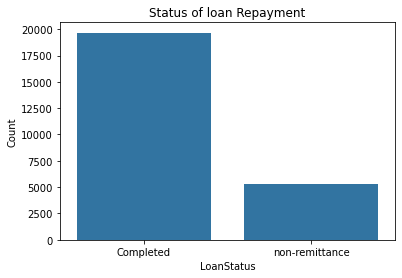

In [28]:
# plotting the graph for the Loan Status column
count_plot(df_loan_clean, 'LoanStatus', 'LoanStatus', 'Count', 'Status of loan Repayment', sns.color_palette()[0])

       

##### The number of loans which have been completed is way higher than those that have defaulted.

##### Question 2: What is the occupation distribution of the loan data

In [29]:
#Plotting the graph to Check occupation distribution 

# Due to the wide variety of the occupations distribution its imperative we check for the top 10 and least 10 occupations with loan occurences
#Top 5 occupations 
Top_5_occupation=df_loan_clean.Occupation.value_counts()[0:5]
Top_5_occupation
#Least 5 occupations
Least_5_occupation=df_loan_clean.Occupation.value_counts()[-5:]


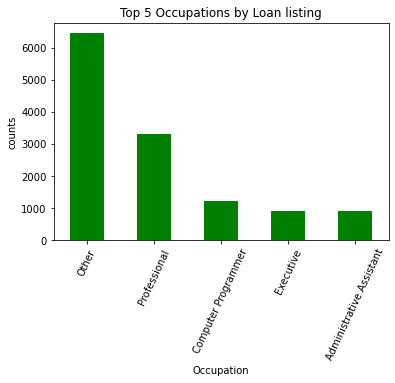

In [30]:
# Top 5 occupations with the highest loan occurences
Top_5_occupation.plot.bar(color='green');

# Top 5 occupations
plt.title('Top 5 Occupations by Loan listing')
plt.ylabel('counts')
plt.xlabel('Occupation')
plt.xticks(rotation=65);



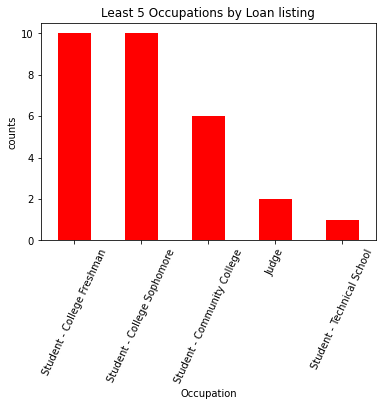

In [31]:
#Least 5 occupations by loan listing
Least_5_occupation.plot.bar(color='red');

plt.title('Least 5 Occupations by Loan listing')
plt.ylabel('counts')
plt.xlabel('Occupation')
plt.xticks(rotation=65);

#### We can see from the distribution also that highest number of loan listings were not specified but it was followed closely by Profesisonals while the occupation with lowest loan listings are students.  This visualization implies that a higher number of people in the corporate world (professionals) obtain loans than artisans and students.

#### Question 3: What is the employment status of the loan distribution.

This would help to a great deal to verify the insights in the previous question which points to the distribution of loan listings across the corporate world and the other walks of life.

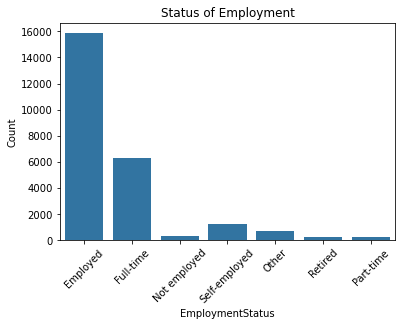

In [32]:
# To check the employment status
count_plot(df_loan_clean, 'EmploymentStatus', 'EmploymentStatus', 'Count', 'Status of Employment', sns.color_palette()[0])
plt.xticks(rotation=45)
plt.show()

##### The Visualization shows glaringly that Employed personnels contribute the largest quota to the total number loan listings in the dataset which also to a great deal support the previous visuals. 

Lets dig deeper into further details

#### Question 4: What is the distribution of the income range 

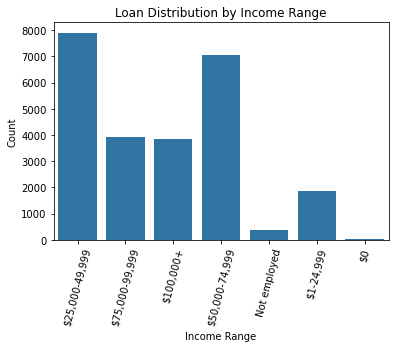

In [33]:
# To check the income range distribution
count_plot(df_loan_clean, 'IncomeRange', 'Income Range', 'Count', 'Loan Distribution by Income Range', sns.color_palette()[0])
plt.xticks(rotation=75)
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,000','$100,000+']
plt.show()

 This shows to a great deal that the highest rate of loan listings occurs in the 25,000-49,999 range and a close second is the 50,000 - 74,999 range while those of higher incomes are considerably lower.

#### Question 5: What is the distribution of the loan according to the term

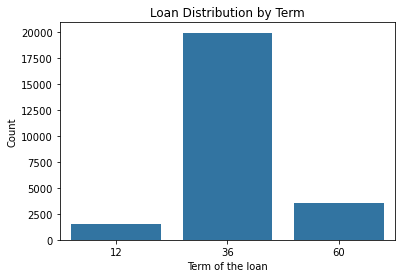

In [34]:
# To check the Term distribution
count_plot(df_loan_clean, 'Term', 'Term of the loan', 'Count', 'Loan Distribution by Term', sns.color_palette()[0])

plt.show()

#### As seen from the chart above the term with the most loan listing occurences is 36 months while the least is 12 months

#### Question 6: What is the distribution of the loan according to origination year

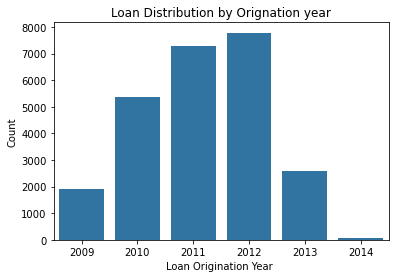

In [35]:
# To check the Loan origination year distribution
count_plot(df_loan_clean, 'LoanOriginationYear', 'Loan Origination Year ', 'Count', 'Loan Distribution by Orignation year', sns.color_palette()[0])

plt.show()

##### 2012 had the highest loan listing occurences while the least was in 2014

#### Question 7: What is the distribution of the loan according to the listing category

In [36]:
# To check the Loan origination year distribution

#Selection of the top 5 and least 5 categories would be taken so we can see where the bulk of the loan listing comes from and also the least .
# Top 5 listing categories
Top_5_Listing_Category=df_loan_clean.ListingCategory.value_counts()[0:5]

#Least 5 Listing Categories
Least_5_Listing_Category=df_loan_clean.ListingCategory.value_counts()[-5:]

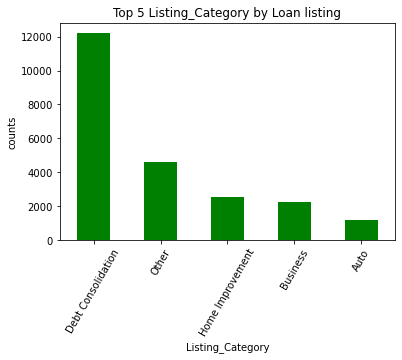

In [37]:
# Top 5 Listing Categories with the highest loan occurences
Top_5_Listing_Category.plot.bar(color='green');

plt.title('Top 5 Listing_Category by Loan listing')
plt.ylabel('counts')
plt.xticks(rotation=60)
plt.xlabel('Listing_Category');

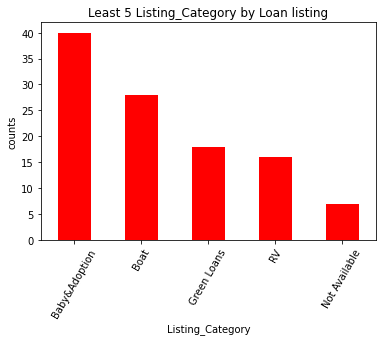

In [38]:
# Least 5 Listing Categories with the highest loan occurences
Least_5_Listing_Category.plot.bar(color='red');

plt.title('Least 5 Listing_Category by Loan listing')
plt.ylabel('counts')
plt.xticks(rotation=60)
plt.xlabel('Listing_Category');

#### We can see from the visualizations that debt consolidation contributes the largest quota to the loan listings while RV(Recreational Vehicle) loans accounts for the lowest specifically named category.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The dataset is quite an interesting one and i was able to gather some insights which are, We have a high number of completed loans as against defaulters and it was also observed that a high number of loan occurrences are from professionals who are gainfully employed in a corporate environment. It was also noticed that majority of loan were given to people with an income range of between 25000 - 49000 USD while the higher income earners were given lesser loans. Also the highest number of loans were given in the year 2012 with 36 month as the term with the highest loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did a top 5 and least 5 selection for both the listing category and occupations columns so i can properly understand the distribution of high performers and low performers as per the loan listings. I also extracted the year from the loan origination date column and i encoded the information from the loan listing category so i can do a proper visualization.

## Bivariate Exploration



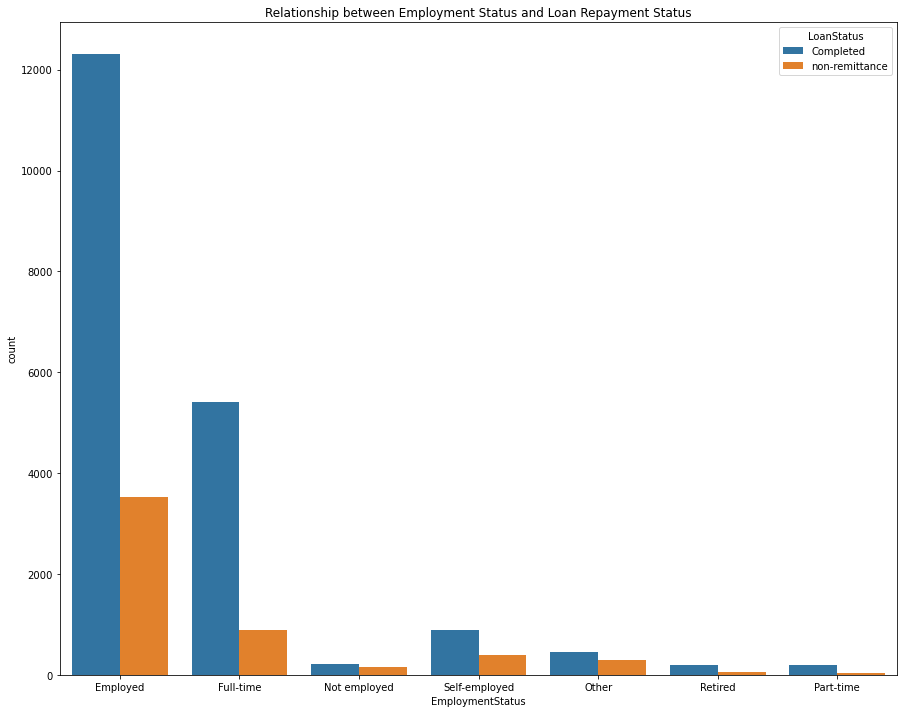

In [39]:
# Let us check the relationship between their employment status and their loan repayment status
plt.figure(figsize = [15, 12])
plt.title('Relationship between Employment Status and Loan Repayment Status')
sns.countplot(data =df_loan_clean, x = 'EmploymentStatus', hue = 'LoanStatus');


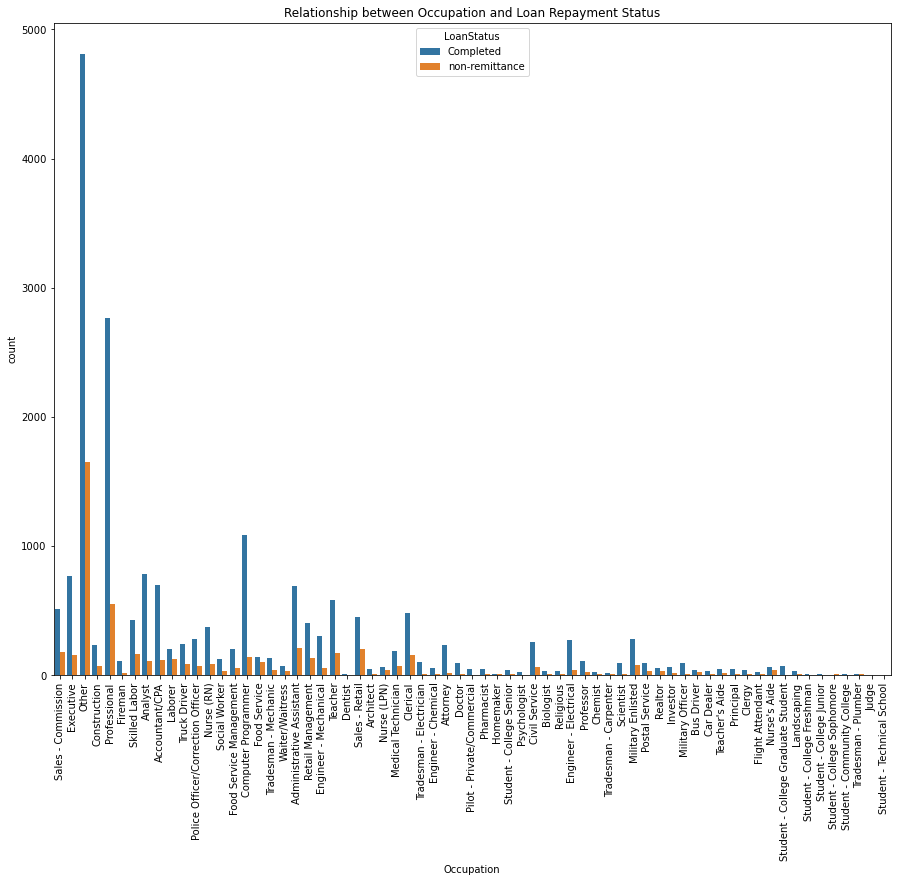

In [40]:
# Let us check the relationship between their Occupation and loan repayment status
plt.figure(figsize = [15, 12])
plt.title('Relationship between Occupation and Loan Repayment Status')
sns.countplot(data =df_loan_clean, x = 'Occupation', hue = 'LoanStatus')
plt.xticks(rotation=90);


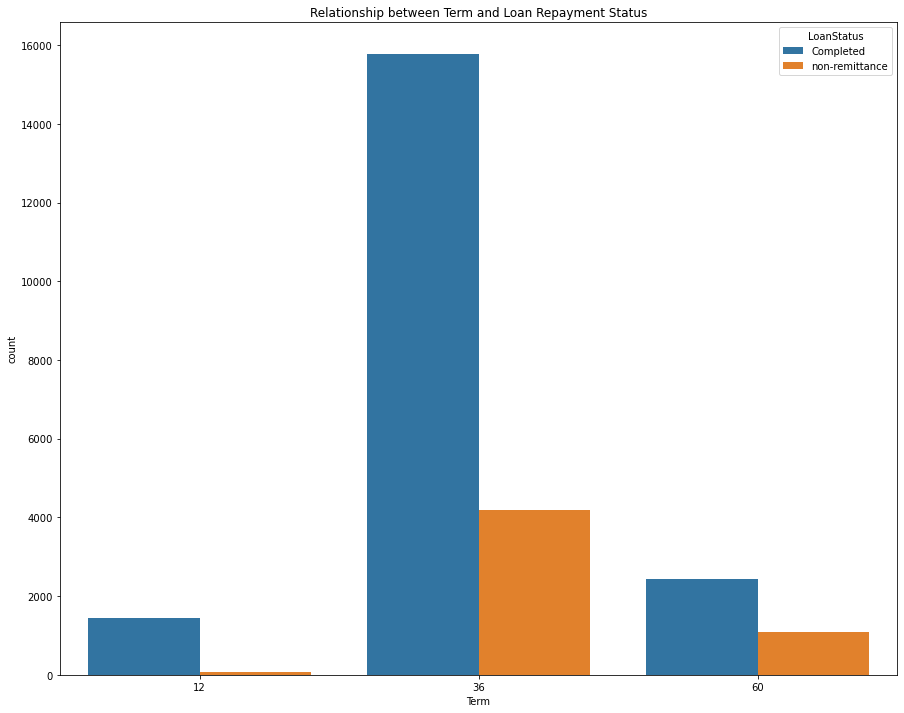

In [41]:
# Let us check the relationship between the term and loan repayment status
plt.figure(figsize = [15, 12])
plt.title('Relationship between Term and Loan Repayment Status')
sns.countplot(data =df_loan_clean, x = 'Term', hue = 'LoanStatus');


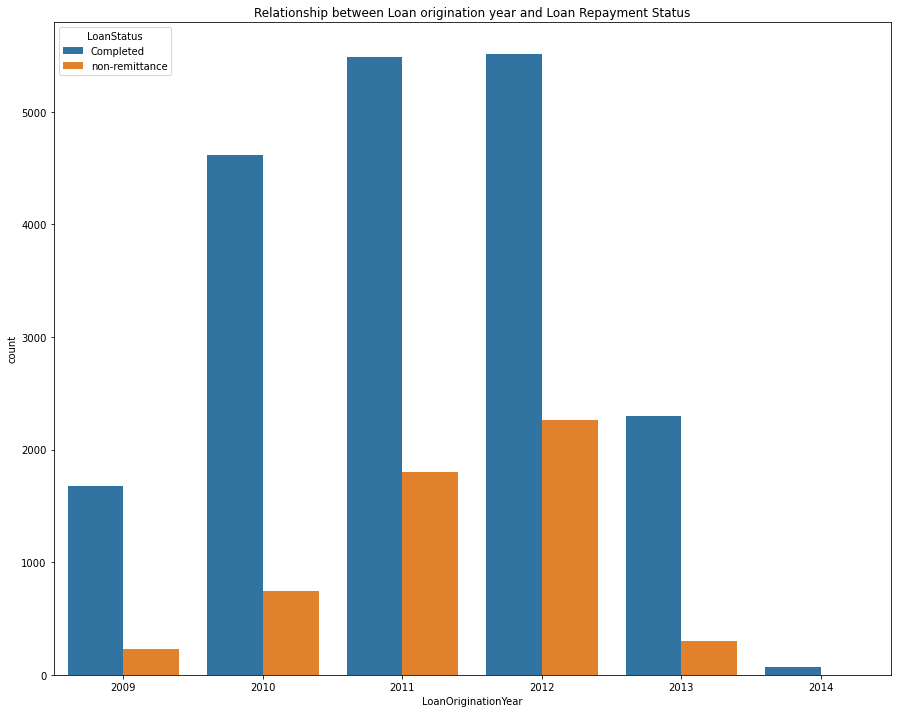

In [42]:
# Let us check the relationship between the Loan origination year and loan repayment status
plt.figure(figsize = [15, 12])
plt.title('Relationship between Loan origination year and Loan Repayment Status')
sns.countplot(data =df_loan_clean, x = 'LoanOriginationYear', hue = 'LoanStatus');


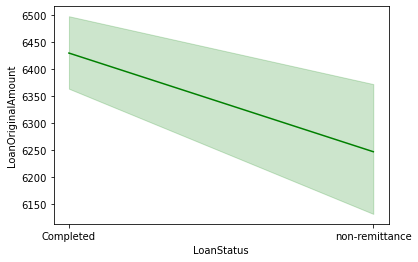

In [43]:
# To check the relationship between loan status and the loan original amount
sns.lineplot(data = df_loan_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', color = 'green');

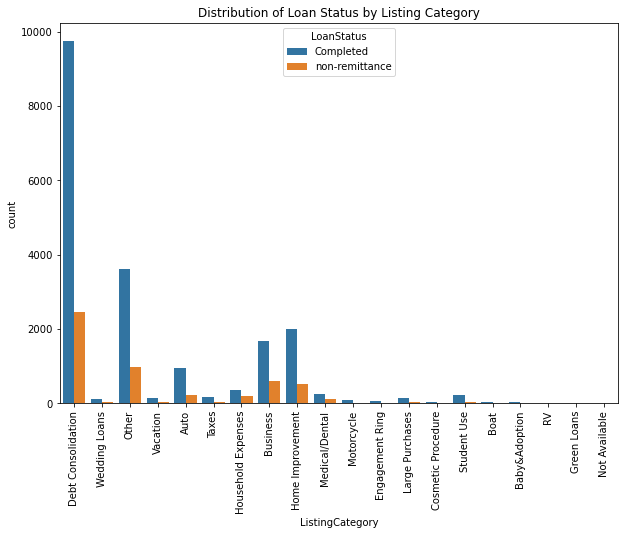

In [44]:
# Distribution of Loan status by Listing Category
plt.figure(figsize = [10, 7])
plt.title('Distribution of Loan Status by Listing Category')
plt.xticks(rotation=90)
sns.countplot(data = df_loan_clean, x = 'ListingCategory', hue = 'LoanStatus'); 

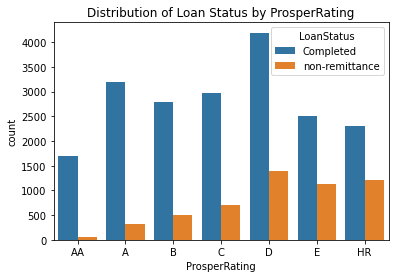

In [46]:
# To show the distribution of loan status by Prosper Rating
plt.title('Distribution of Loan Status by ProsperRating')
plt.xticks(rotation=0)
xorder = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
sns.countplot(data = df_loan_clean, x = 'ProsperRating', hue = 'LoanStatus', order=xorder);

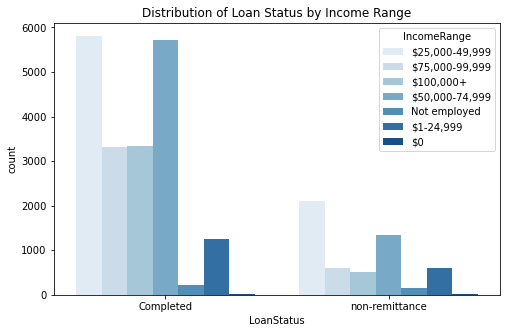

In [47]:
# Income Range and Loan Status
plt.figure(figsize = [8, 5])
plt.title('Distribution of Loan Status by Income Range')
sns.countplot(data = df_loan_clean.query("LoanStatus in ('non-remittance','Completed')"), x = 'LoanStatus', hue = 'IncomeRange', palette='Blues');

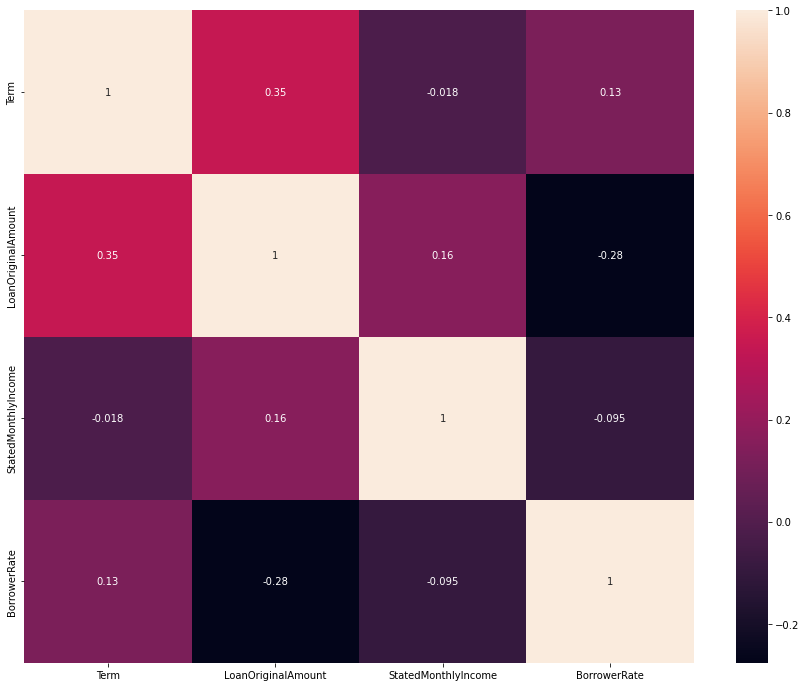

In [48]:
# Let us plot a heatmap of the data set to see the correlation
plt.figure(figsize = [15, 12])
sns.heatmap(df_loan_clean[['Term','LoanOriginalAmount','StatedMonthlyIncome','BorrowerRate']].corr(), annot=True);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The majority of borrowers who defaulted on their loans had full-time jobs, and most of them earn between 25,000 and 49,999 annually with the income range of 50,000 and 74,999 coming a close second. My further research reveals that customers who borrow money for debt consolidation typically default more often, and most loans fall into the good rating D area. The majority of defaulted loans have balances between 4,000 and 8,000

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

A negative correlation exists between the borrowers rate and the loan original amount which goes a long way to imply that when the rates are higher people obtain lesser loan amounts and vice versa. Also there is a positive correlation between the stated monthly income and the loan original amount.

## Multivariate Exploration



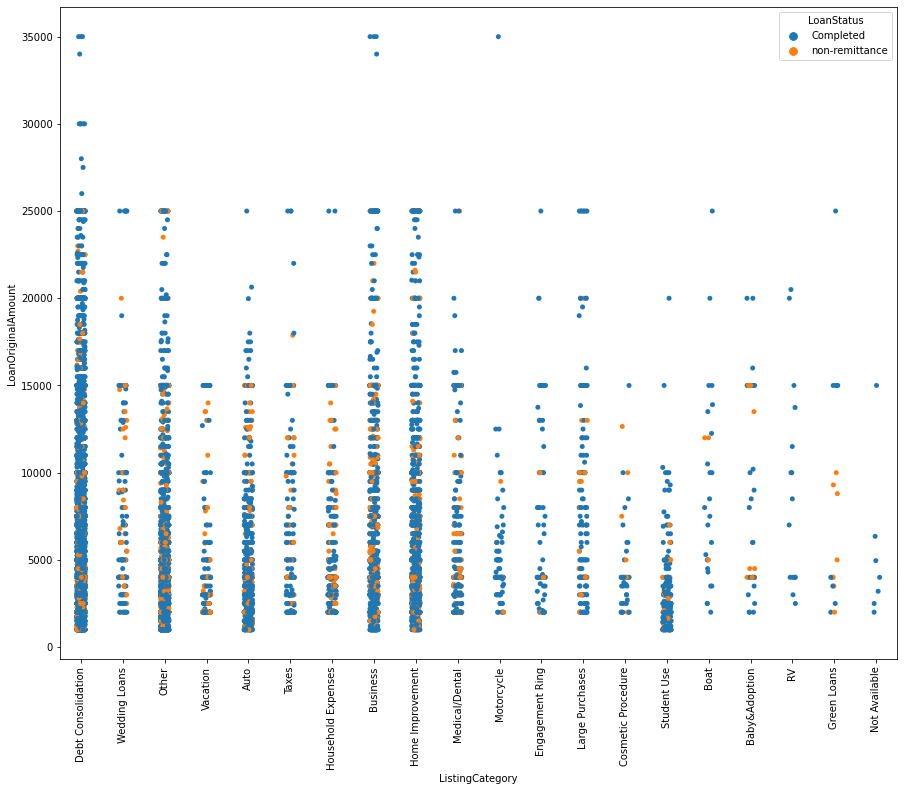

In [49]:
# Exploring Original Loan Amount, Listing Category and Loan Status
plt.figure(figsize = [15, 12])
plt.xticks(rotation=90)
sns.stripplot(data=df_loan_clean, x='ListingCategory', y='LoanOriginalAmount', hue='LoanStatus');



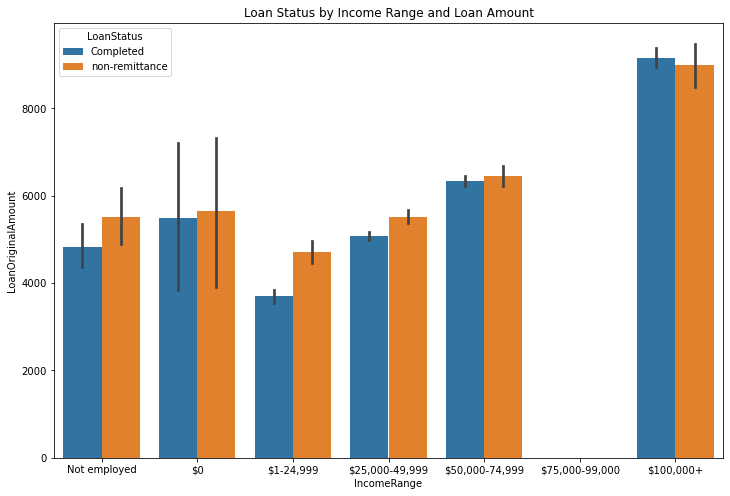

In [50]:
# Plot to explore the loan status by income range and loan amount
plt.figure(figsize = [12, 8])
plt.title('Loan Status by Income Range and Loan Amount')
sns.barplot(data=df_loan_clean, x='IncomeRange', y='LoanOriginalAmount', hue='LoanStatus', order = order);

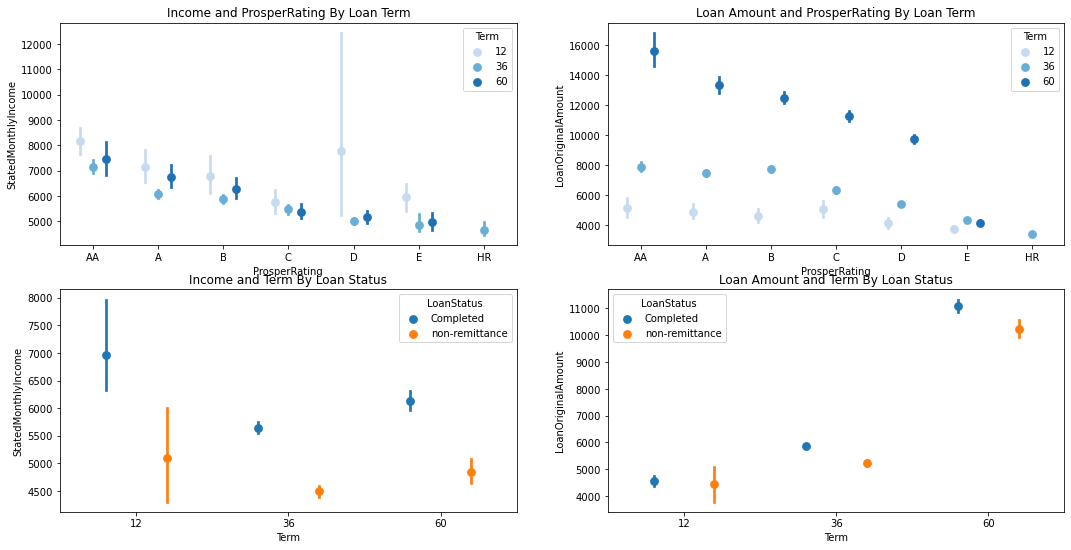

In [51]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=[18,9])
sns.pointplot(data = df_loan_clean, x = 'ProsperRating', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, order=xorder, ax=ax[0,0]).set(title='Income and ProsperRating By Loan Term')
sns.pointplot(data = df_loan_clean, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4,order=xorder, ax=ax[0,1]).set(title='Loan Amount and ProsperRating By Loan Term')
sns.pointplot(data = df_loan_clean, x = 'Term', y = 'StatedMonthlyIncome', hue = 'LoanStatus',
           linestyles = '', dodge = 0.4, ax=ax[1,0]).set(title='Income and Term By Loan Status')
sns.pointplot(data = df_loan_clean, x = 'Term', y = 'LoanOriginalAmount', hue = 'LoanStatus',
           linestyles = '', dodge = 0.4, ax=ax[1,1]).set(title='Loan Amount and Term By Loan Status');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Loan Amounts with larger ranges of default are listed under the categories of debt consolidation, wedding loans, baby and adoption loans, business loans, and home improvements. The greatest loan categories with defaults are also those with incomes between 25K and 100K. People with credit ratings of AA and A typically take out longer-term loans, while those with loan ratings of D opt for shorter ones. Smaller loans between 4,500 and 5,000 with a 12-month duration have a higher default rate.


### Were there any interesting or surprising interactions between features?

> Apparently there were lots of interesting interactions which  i would be citing here. Loans with 12-month periods typically belong to lower loan categories and see fewer defaults. Another surprise interaction is that while borrowers with jobs tend to default on loans more frequently, people with no work or other sources of income seem to be able to pay back their obligations. Loans with larger sums over a 60-month period seem to be completed, even for borrowers in the upper income level, but default when the time is shorter. In addition, fewer loans have defaulted since their peak in 2013, most likely as a result of the company's reduction in lending volume after 2013.

## Conclusions
> The exploration is all about Loan status and what factors can affect the loan status. The following features have been observed to have effect on the loan status
>1. Employment Status
>2. Income Range
>3. Term
>4. BorrowerRate
>5. ListingCategory
>6. ProsperRating


> Although the majority of loans are given to employed individuals, this analysis reveals that borrowers with incomes between 25k and 49k are more likely to default on their loans.When the listing category is for weddings, babies, and adoptions, the default rate is higher for this group, so the business may need to take this into consideration when considering loan requests from other individuals.
Due diligence must be conducted to determine whether borrowers' ProsperRatings are HR, D, or E, which appear to be the ProsperRatings with the highest Default Rates. Additionally, borrowers with higher BorrowerRates are more likely to default.

In [ ]:
#Save the wrangled data to the workspace to be used in the slides notebook
df_loan_clean.to_csv('Prosper_Loan_data_clean.csv')